In [253]:
# 필요 라이브러리 import.
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [261]:
# payment 데이터 데이터 프레임으로 로딩
payment = pd.read_csv('/home/mlhacker/Downloads/DS_assignment/data/linux/payment.csv')

In [262]:
# 레코드 수 확인
len(payment)

7308

In [263]:
# 로딩된 데이터 확인.
payment.head()

,user_idx,subscription_type,cart_discount_price,order_shipping_price,order_total_price,paid_date
0,0973f573635c1b55a58f1d221f992bfeb0b3e007a93efb...,구독,5100,3000,12900,2020-10-21
1,305181c0babb5077b46ccb298a41469729a6760b19e44d...,구독,5100,3000,12900,2020-10-09
2,5fa450bdb2e831617f0132293d63638e0f93f1f62af4ca...,구독,5100,3000,12900,2020-10-11
3,85649b91d8ac8d2e84faa6c54032254356fe02c69d5fa0...,구독,5100,3000,12900,2020-10-14
4,05afd1abc70fce9afaa18482a0bb9c6cb082e65b1e0ab4...,구독,5100,3000,12900,2020-10-21


In [275]:
# 데이터 속성 값 특징 확인.
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7308 entries, 0 to 7307
Data columns (total 6 columns):
user_idx                7308 non-null object
subscription_type       7277 non-null object
cart_discount_price     7308 non-null int64
order_shipping_price    7308 non-null int64
order_total_price       7308 non-null int64
paid_date               7308 non-null object
dtypes: int64(3), object(3)
memory usage: 342.6+ KB


In [279]:
payment['subscription_type'].unique()

array(['구독', nan], dtype=object)

In [ ]:
# 시간 관련 분석을 용이하게 하기 위해, paid_date컬럼 타입을 datetime으로 변환.
payment['paid_date'] = pd.to_datetime(payment['paid_date'])

In [ ]:
# 로딩된 데이터에 SQL을 적용하기 위해 sqldf 설정.
pysqldf = lambda q: sqldf(q, globals())

In [ ]:
#######################
# 일별 매출액 및 구매자 수 #
#######################

In [252]:
# 일별 매출액 및 구매자 수 쿼리.
qry = """SELECT paid_date as 'day', count(user_idx) as 'users', sum(order_total_price) as 'sales' 
         FROM payment
         GROUP BY paid_date
         ORDER BY paid_date asc;"""

In [45]:
daily_sales = pysqldf(qry)

In [251]:
daily_sales.head()

,day,users,sales
0,2020-08-31,1,18000
1,2020-09-07,1,12900
2,2020-09-09,2,12900
3,2020-09-10,1,12900
4,2020-09-11,1,0


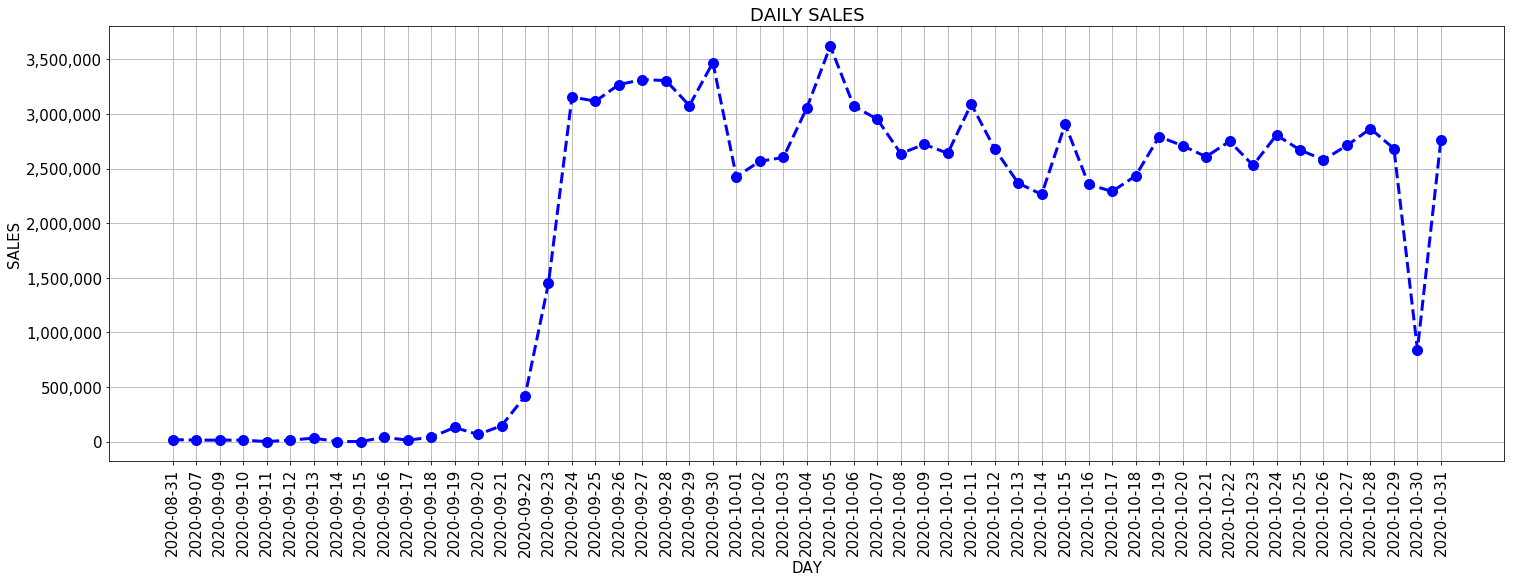

In [294]:
# 일별 매출액 그래프.
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(25, 8))
plt.plot(daily_sales.day, daily_sales.sales, color='blue', linestyle='--', marker='o', linewidth=3, markersize=10)
plt.title('DAILY SALES')
plt.xlabel('DAY')
plt.ylabel('SALES')
plt.xticks(rotation='vertical')
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

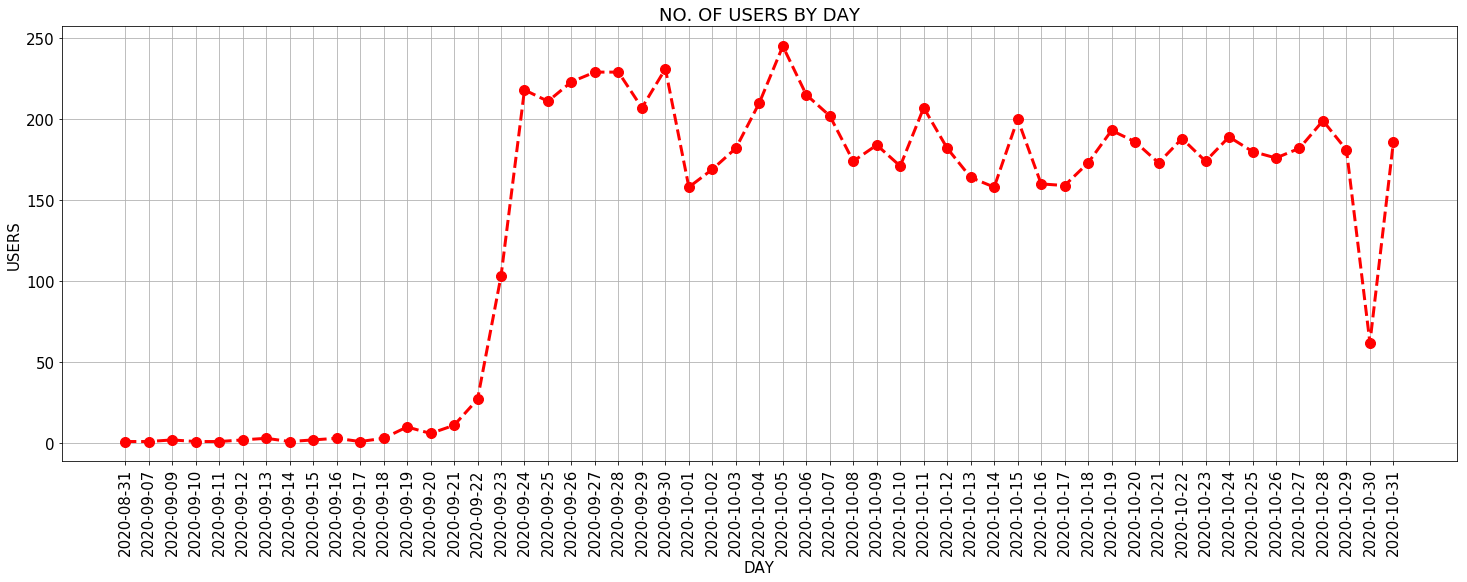

In [293]:
# 일별 구매자 수 그래프
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(25, 8))
plt.plot(daily_sales.day, daily_sales.users, color='red', linestyle='--', marker='o', linewidth=3, markersize=10)
plt.title('NO. OF USERS BY DAY')
plt.xlabel('DAY')
plt.ylabel('USERS')
plt.xticks(rotation='vertical')
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [ ]:
#######################
# 주별 매출액 및 구매자 수 #
#######################

In [239]:
# 그래프 마커에 주별/월별 매출 값을 표시하기 위한 함수 설정.
def show_marker_values(x, y):
    #adding text inside the plot
    for i in range(len(x)):
        plt.text(x[i], y[i], "{:,}".format(y[i]), fontsize = 22)

In [122]:
# paid_date 컬럼으로 부터 해당 주 추출
payment['week_number'] = payment['paid_date'].dt.week

In [124]:
payment.head()

,user_idx,subscription_type,cart_discount_price,order_shipping_price,order_total_price,paid_date,week_number
0,0973f573635c1b55a58f1d221f992bfeb0b3e007a93efb...,구독,5100,3000,12900,2020-10-21,43
1,305181c0babb5077b46ccb298a41469729a6760b19e44d...,구독,5100,3000,12900,2020-10-09,41
2,5fa450bdb2e831617f0132293d63638e0f93f1f62af4ca...,구독,5100,3000,12900,2020-10-11,41
3,85649b91d8ac8d2e84faa6c54032254356fe02c69d5fa0...,구독,5100,3000,12900,2020-10-14,42
4,05afd1abc70fce9afaa18482a0bb9c6cb082e65b1e0ab4...,구독,5100,3000,12900,2020-10-21,43


In [149]:
# 주별 매출액 및 구매자 수 쿼리.
qry = """
        SELECT (week_number-35) as week, count(user_idx) as users, sum(order_total_price) as sales
        FROM payment
        GROUP BY week
        ORDER BY week asc;"""

In [150]:
weekly_sales = pysqldf(qry)

In [151]:
weekly_sales.head()

,week,users,sales
0,1,1,18000
1,2,10,82500
2,3,26,283800
3,4,1022,14870900
4,5,1386,20508700
5,6,1398,20740800
6,7,1196,17299500
7,8,1283,18873000
8,9,986,14450400


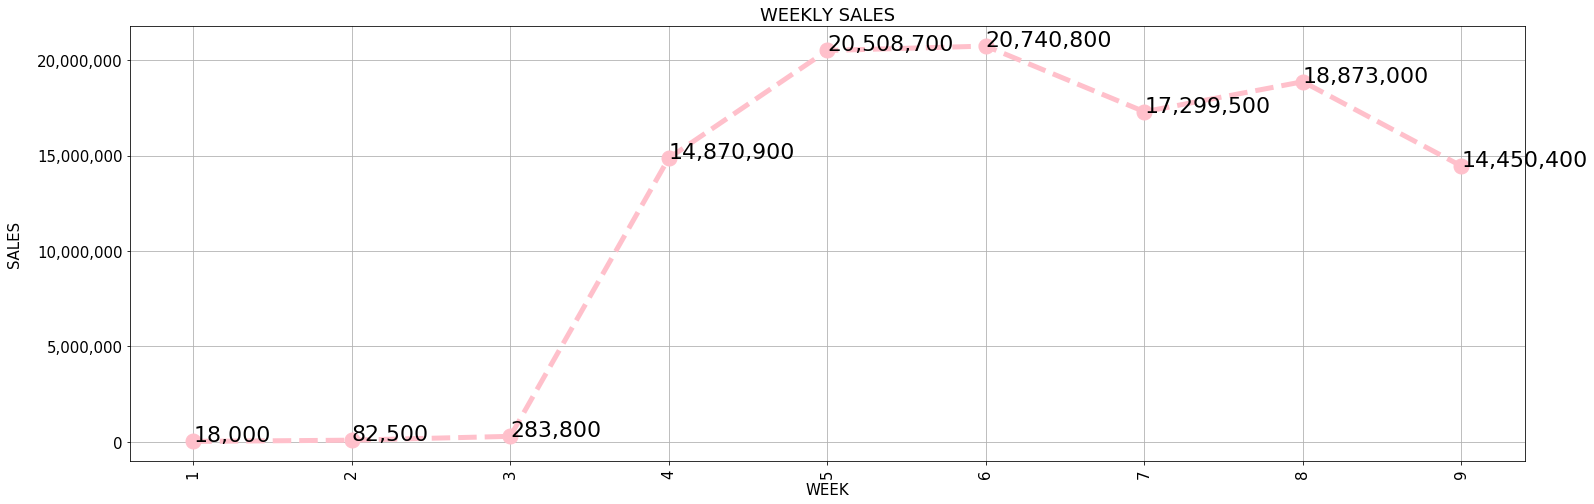

In [292]:
# 주별 매출액 그래프.
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(25, 8))
plt.plot(weekly_sales.week, weekly_sales.sales, color='pink', linestyle='--', marker='o', linewidth=5, markersize=15)
show_marker_values(weekly_sales.week, weekly_sales.sales)
plt.title('WEEKLY SALES')
plt.xlabel('WEEK')
plt.ylabel('SALES', labelpad=15)
plt.xticks(rotation='vertical')
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

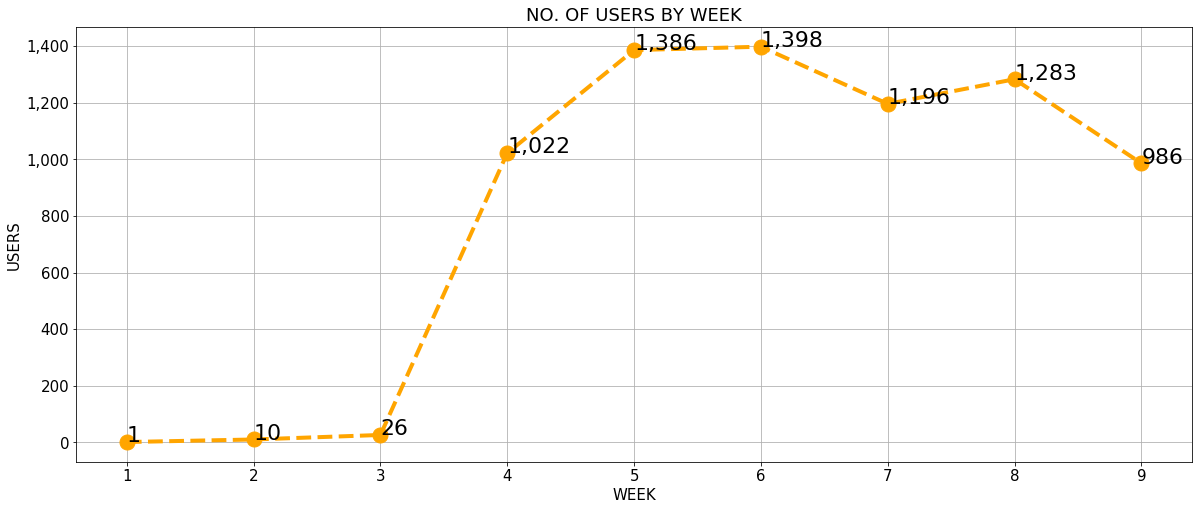

In [290]:
# 주별 구매자 수 그래프.
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(20, 8))
plt.plot(weekly_sales.week, weekly_sales.users, color='orange', linestyle='--', marker='o', linewidth=4, markersize=15)
show_marker_values(weekly_sales.week, weekly_sales.users)
plt.title('NO. OF USERS BY WEEK')
plt.xlabel('WEEK')
plt.ylabel('USERS')
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [ ]:
#######################
# 일별 매출액 및 구매자 수 #
#######################

In [162]:
# paid_date 컬럼으로 부터 해당 주 추출
payment['month'] = payment['paid_date'].dt.month

In [163]:
# 주별 매출액 및 구매자 수.
qry = """
        SELECT month, count(user_idx) as users, sum(order_total_price) as sales 
        FROM payment
        GROUP BY month
        ORDER BY month asc;"""

In [164]:
monthly_sales = pysqldf(qry)

In [165]:
monthly_sales.head()

,month,users,sales
0,8,1,18000
1,9,1725,25093500
2,10,5582,82016100


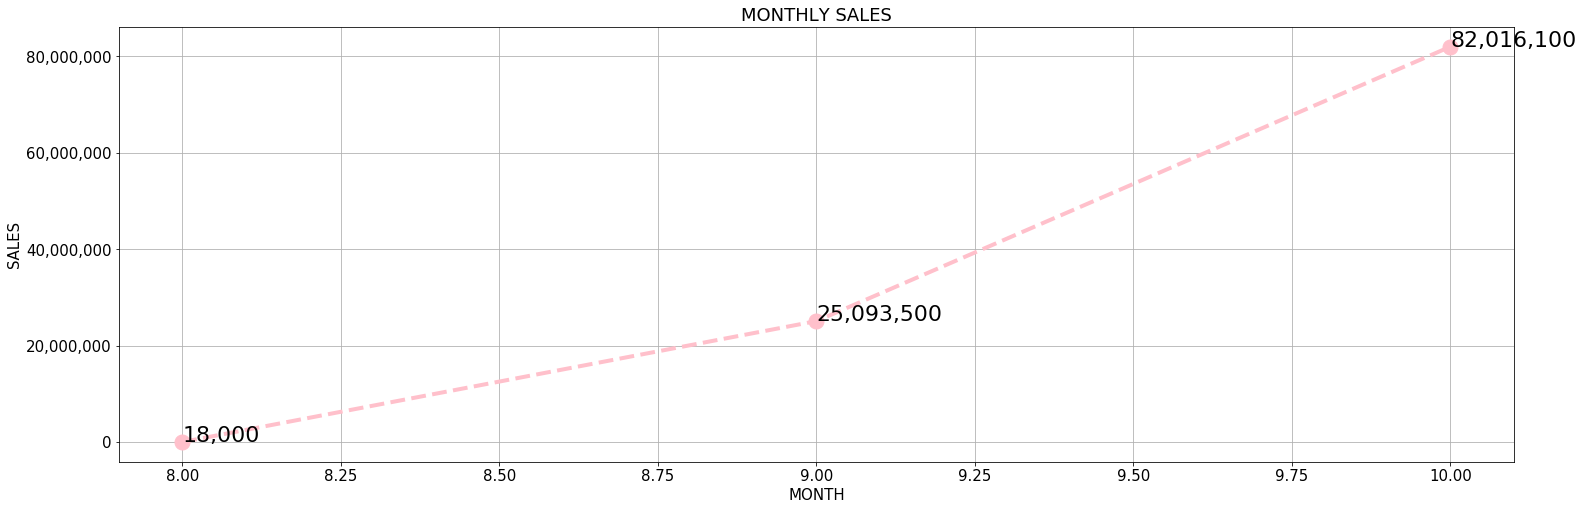

In [291]:
# 월별 매출액 그래프.
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(25, 8))
plt.plot(monthly_sales.month, monthly_sales.sales, color='pink', linestyle='--', marker='o', linewidth=4, markersize=15)
show_marker_values(monthly_sales.month, monthly_sales.sales)
plt.title('MONTHLY SALES')
plt.xlabel('MONTH')
plt.ylabel('SALES')
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

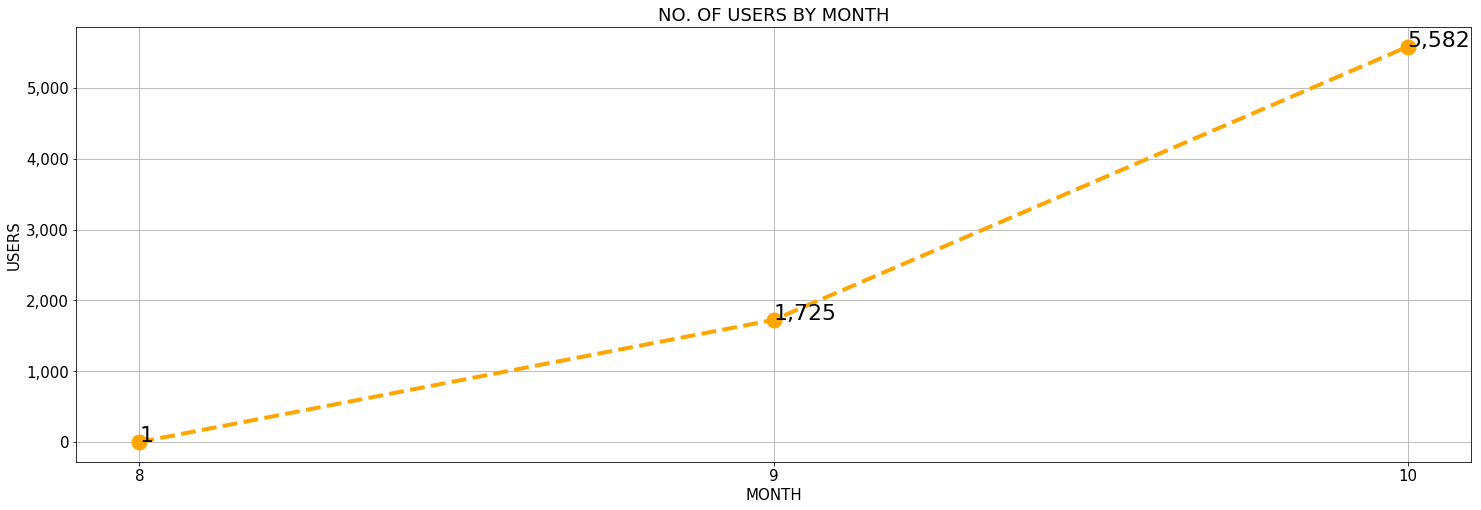

In [289]:
# 월별 매출액 그래프.
plt.rcParams['font.family'] = 'sans-serif' # 폰트 적용
plt.rcParams['font.size'] = 15             # font 크기 조절
plt.figure(figsize=(25, 8))
plt.plot(monthly_sales.month, monthly_sales.users, color='orange', linestyle='--', marker='o', linewidth=4, markersize=15)
show_marker_values(monthly_sales.month, monthly_sales.users)
plt.title('NO. OF USERS BY MONTH')
plt.xlabel('MONTH')
plt.ylabel('USERS')
plt.yticks(fontsize=15)
plt.xticks(range(8,11), fontsize=15)
plt.grid(True)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()